# Kings County Housing Sales Analysis

Student: Bonny Nichol<br>
Self Paced<br>
Scheduled Date: February 28, 2020<br>
Instructor Name: Jeff Herman<br>
Blog Post URL: https://medium.com/@bonnynichol <br>
Update: October 2, 2020

***
# Context and Objective
The objective of this project is to predict the sales prices of houses in Kings County, WA.<br> 
This project will use the OSEMiN Data Science Method. Obtaining, Scrubbing, Exploring, Modeling, and Interpreting Data. 


## 00 Introduction
Kings County Demographics<br>
Python Libraries Used<br>

## 01 Obtain Data
Importing Data from .CSV file<br>
First Observations of Data


## 02 Data Cleaning
Resolving Missing Values<br>
Making sure data is normally distributed<br>
Removing outliers<br>
Tranforming categorical variables<br>
Log transformations

## 03 Data Exploration
Initial Questions<br>
Exploring multicollinearity

## 04 Model Data
Train-Test-Split<br>
Regression<br>
OLS

## 05 Interprete Data
Stepwise Selection<br>
Cross validation<br>
Feature Selection<br>
Repeating Stepwise Selection<br>
Evaluating P Values<br>
Conclusions

***
## Introduction

#### Kings County Demographics <br>

Kings County, WA is located in the state of Washington in the northwest corner of the United States of America. The region contains Seattle, the largest city in the state and capital and is also the 12th most populous county in the United States.

#### Python Libraries <br>
Pandas <br>
Seaborn <br>
Numpy <br>
Matplotlib.pyplot<br>
sklearn<br>
statsmodels.api
***

In [2]:
#data and visualizations
import pandas as pd
import seaborn as sns
import numpy as np

#modeling
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from matplotlib.axes._axes import _log as matplotlib_axes_logger

#feature selection
from sklearn.feature_selection import RFE

%matplotlib inline
plt.style.use('seaborn')

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 21)
pd.set_option('display.max_rows', 70)

***
## Step One: Obtain Data

The first process of OSEMiN data science method is to bring the data into the Python environment. Typcially, the data can exist in many formats including MySQL, Oracle, MongoDB. The data can come from Website APIs, scraped data from the web or flat text data types like datasets from Kaggle. For this project we are importing a CSV file and using the Pandas library for this conversion into Python.
***

In [3]:
# load dataset
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


Quick check of the data for missing values:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From the above we learned valuable metadata of our dataset like the number of cols and rows, the number of values in each column and the data type of each column.

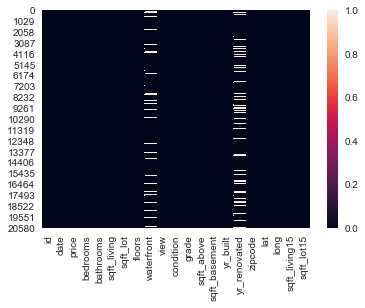

In [5]:
#A heatmap of the missing values visually shows the data that is missing
sns.heatmap(df.isnull())
plt.show()

We can tell from the heatmap and from the full summary of the dataframe, columns 'waterfront', 'yr_renovated' and 'view' are missing data. We will resolve this when we clean the data.

***
## First Observations

This dataset includes 21597 data observations with 21 features described below.
<br>
<br>__id__ id number for the data entry
<br>__date__ date the house was sold
<br>__price__ price of the house
<br>__bedrooms__ number of bedrooms in the house
<br>__bathrooms__ number of bathrooms in the house
<br>__sqft_living__ square footage of the living room
<br>__sqft_lot__ square footage of the lot size
<br>__floors__ number of floors in the house
<br>__waterfront__ if the house is located at the waterfront (1 = yes, 0 = no)
<br>__view__ does the house have a view
<br>__condition__ condition of the house
<br>__grade__ grade level of the house
<br>__sqft_above__ square footage of the house not including the basement
<br>__sqft_basement__ square footage of only the basement
<br>__yr_built__ year the house was built
<br>__yr_renovated__ year the house was renovated
<br>__zipcode__ zipcode where the house is located
<br>__lat__ latitude where the house is located
<br>__long__ longitude where the house is located
<br>__sqft_living15__ square footage of the living area in 2015 (this implies there were renovations)
<br>__sqft_lot15__ square footage of the lot size in 2015


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a3cd97860>,
      dtype=object)

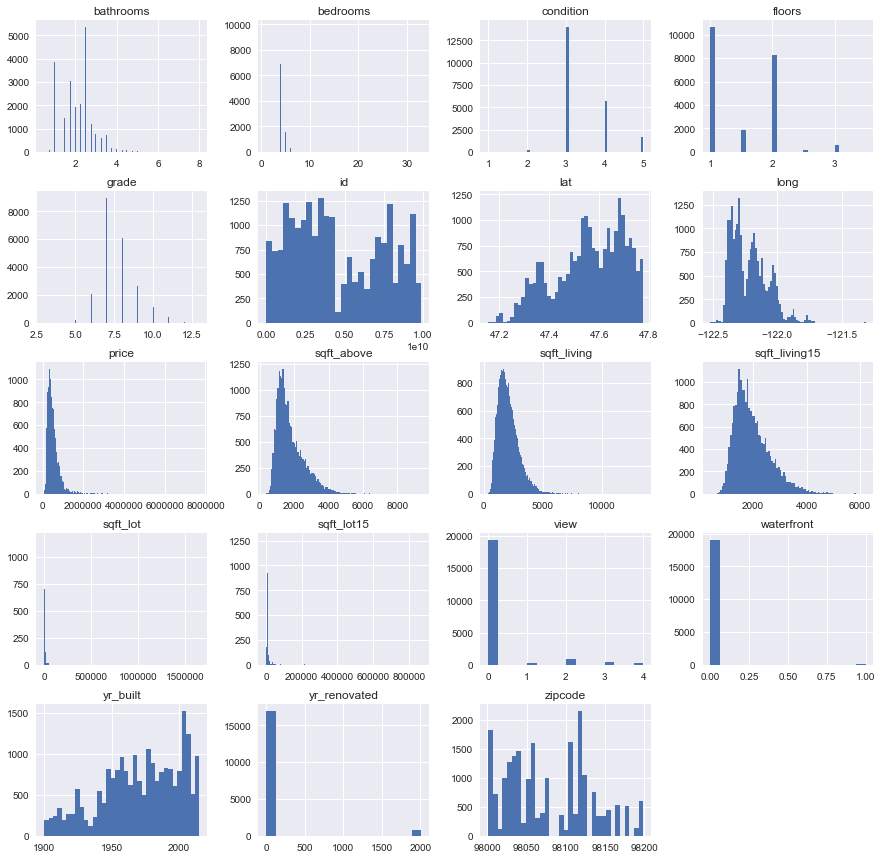

In [6]:
#Exploring pre-scrubbed data
df.hist(bins = 'auto', figsize=(15,15), grid = True)

Observations:
There is not a lot of normal distribution in the features. This will need to be solved before creating our model. price, sqft_above, sqft_living, sqft_living15 are all continuous and appear to be log normally distributed.

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


We can also begin to see some big problems with the data such as the bedrooms feature having a max data entry of 33 bedrooms. Whether an entry like resembles a large mansion or the data is an error, we will need to remove it and other outliers when we clean our data. We can also see some problems with scaling of some of the features that will need to be resolved.

In [8]:
#sorting by id
sortedbyid = df.sort_values('id')
sortedbyid.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.00,6,3.00,2400,9373,2.00,0.00,0.00,3,7,2400,0.0,1991,0.00,98002,47.33,-122.21,2060,7316
2494,1000102,9/16/2014,280000.00,6,3.00,2400,9373,2.00,nan,0.00,3,7,2400,0.0,1991,0.00,98002,47.33,-122.21,2060,7316
6729,1200019,5/8/2014,647500.00,4,1.75,2060,26036,1.00,nan,0.00,4,8,1160,900.0,1947,0.00,98166,47.44,-122.35,2590,21891
8404,1200021,8/11/2014,400000.00,3,1.00,1460,43000,1.00,0.00,0.00,3,7,1460,0.0,1952,0.00,98166,47.44,-122.35,2250,20023
8800,2800031,4/1/2015,235000.00,3,1.00,1430,7599,1.50,0.00,0.00,4,6,1010,420.0,1930,0.00,98168,47.48,-122.27,1290,10320


There are clear duplicates for ID. This is probably because the houses were sold multiple times after renovation.

In [9]:
#First analysis of 'Price' in the dataset
price = df['price']

#minimum price in dataset
minimum_price = np.min(price)

#maximum price in dataset
maximum_price = np.max(price) 

#mean price in dataset
mean_price = round(np.mean(price), 2)

#median price
median_price = np.median(price)

# standard deviation of price rounded to 2 decimal places
std_price = round(np.std(price), 2)

#printing results
print('Stats for Kings County Housing Prices: \n')
print('Minimum price: ' + str(minimum_price) + '\n')
print('Maximum price: ' + str(maximum_price) + '\n')
print('Mean price: ' + str(mean_price) + '\n')
print('Median price: ' + str(median_price) + '\n')
print('Standard Deviation of Prices: ' + str(std_price) + '\n')

Stats for Kings County Housing Prices: 

Minimum price: 78000.0

Maximum price: 7700000.0

Mean price: 540296.57

Median price: 450000.0

Standard Deviation of Prices: 367359.63



***
## Step Two: Data Cleaning

The goal of scrubbing data is to create standardized data formats so that later in the project there will not be any interferences with the model.<br>

We see in our initial observations that we have missing values, non normally distributed data, outliers, and other problems with out data that we must solve now.

1. Replacing missing values with median value
2. Cleaning up data types
3. Perfoming Log transformations and removing outliers to create normal distributions
4. Dropping unnecessary columns 


In [10]:
#Resolving Missing Values 
#Replacing 'waterfront' and 'yr_renovated' NaN values with median values
#We are replacing with median values because median values are less sensitive than mean values

df['waterfront'].fillna(df['waterfront'].median(), inplace = True)
df['yr_renovated'].fillna(df['yr_renovated'].median(), inplace = True)    

# replacing NaN values in 'View' with 0 and making it an integer
df.loc[df.view.isna(), 'view'] = 0
df.view = df.view.astype('int')

#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

This is starting to look better but now I want to deal with the object types of 'date' and 'sqft_basement'. First I will change the date into a datetime format.

In [11]:
# Converting date to datetime
df.date = pd.to_datetime(df.date)

In [12]:
#Tidying up fields of data
#Replacing '?' in 'sqft_basement' with 0

df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [13]:
#checking for extraneous values by reviewing top occuring values in each feature
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620    0.00
1825069031   0.00
2019200220   0.00
7129304540   0.00
1781500435   0.00
Name: id, dtype: float64 


date 
 2014-06-23   0.01
2014-06-25   0.01
2014-06-26   0.01
2014-07-08   0.01
2015-04-27   0.01
Name: date, dtype: float64 


price 
 350000.00   0.01
450000.00   0.01
550000.00   0.01
500000.00   0.01
425000.00   0.01
Name: price, dtype: float64 


bedrooms 
 3   0.45
4   0.32
2   0.13
5   0.07
6   0.01
Name: bedrooms, dtype: float64 


bathrooms 
 2.50   0.25
1.00   0.18
1.75   0.14
2.25   0.09
2.00   0.09
Name: bathrooms, dtype: float64 


sqft_living 
 1300   0.01
1400   0.01
1440   0.01
1660   0.01
1010   0.01
Name: sqft_living, dtype: float64 


sqft_lot 
 5000   0.02
6000   0.01
4000   0.01
7200   0.01
7500   0.01
Name: sqft_lot, dtype: float64 


floors 
 1.00   0.49
2.00   0.38
1.50   0.09
3.00   0.03
2.50   0.01
Name: floors, dtype: float64 


waterfront 
 0.00   0.99
1.00   0.01
Name: waterfront, dtype: float64 


view 
 0   0.90
2   0.04
3   0.02
1   0

In [14]:
#Dropping Unnecessary Columns
to_drop = ['id', 'date', 'grade', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

df.drop(to_drop, axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.00,3,1.00,1180,5650,1.00,0.00,0,3,1180,0.00,1955,0.00,98178
1,538000.00,3,2.25,2570,7242,2.00,0.00,0,3,2170,400.00,1951,1991.00,98125
2,180000.00,2,1.00,770,10000,1.00,0.00,0,3,770,0.00,1933,0.00,98028
3,604000.00,4,3.00,1960,5000,1.00,0.00,0,5,1050,910.00,1965,0.00,98136
4,510000.00,3,2.00,1680,8080,1.00,0.00,0,3,1680,0.00,1987,0.00,98074


In [15]:
#x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_basement']
#pd.plotting.scatter_matrix(df[x_cols], figsize=(15,15));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a3d57ca58>,
      dtype=object)

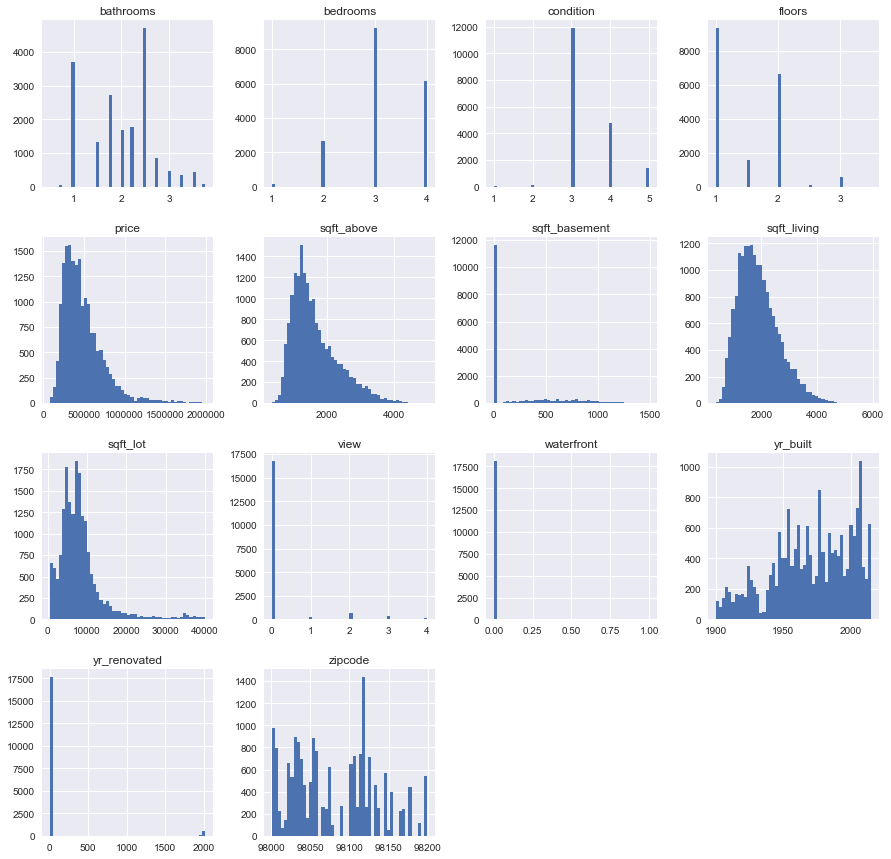

In [16]:
#Removing Outliers

df = df[df.price < 2000000]

df = df[df.sqft_living < 6000]

df = df[df.sqft_lot < 40000]

df = df[df.bedrooms < 5]

df = df[df.bathrooms < 4]

df = df[df.sqft_above < 5000]

df = df[df.sqft_basement < 1500]

df.hist(bins = 50, figsize=(15,15), grid = True)

Observations:
We can tell from the distribution of data in more vertical column orientations, that the features 'bedrooms', 'floors', 'waterfront', 'view' and 'condition' can be treated as categorial variables. 

In [17]:
#I will drop the feature 'yr_renovated' because there does not seem to be a lot of data
#I will also drop 'zipcode' because I don't believe it will perform well in a regression model later.
df.drop(['zipcode', 'yr_renovated'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,221900.00,3,1.00,1180,5650,1.00,0.00,0,3,1180,0.00,1955
1,538000.00,3,2.25,2570,7242,2.00,0.00,0,3,2170,400.00,1951
2,180000.00,2,1.00,770,10000,1.00,0.00,0,3,770,0.00,1933
3,604000.00,4,3.00,1960,5000,1.00,0.00,0,5,1050,910.00,1965
4,510000.00,3,2.00,1680,8080,1.00,0.00,0,3,1680,0.00,1987


## Step Three: Data Exploration

### In this step, we can begin to answer some questions:<br>
1. Does basement size have an impact on price?
2. Is there a relationship between year built and price?
3. What is the relationship between sqft of the lot and price?


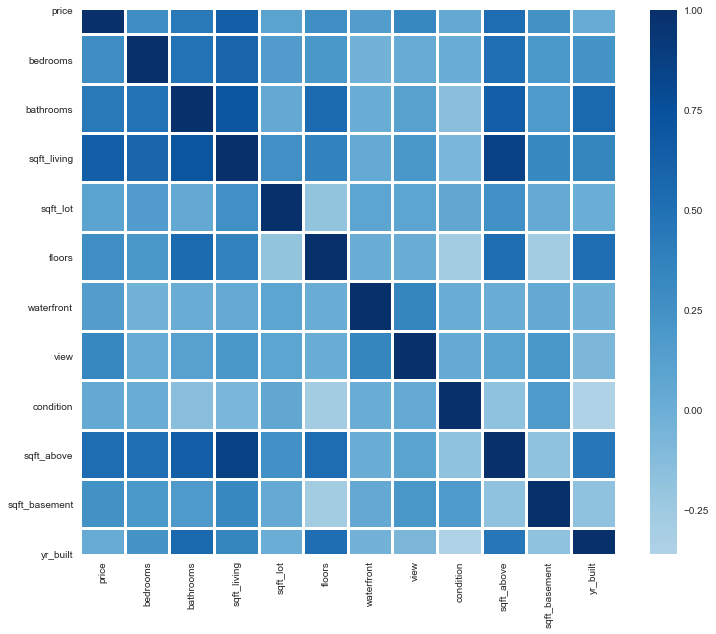

In [18]:
#Investigating Multicollinearity with a heatmap
f, ax = plt.subplots(figsize=(12,10))

sns.heatmap(df.corr(), center=0, linewidths=2, cmap="Blues");

As we can see above, the darker color data are more likely to have a correlation. Let's check in numbers how closely relatd these features actually are.

In [19]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
price,1.00,0.27,0.44,0.63,0.09,0.27,0.15,0.33,0.05,0.53,0.24,0.02
bedrooms,0.27,1.00,0.48,0.59,0.16,0.20,-0.03,0.03,0.02,0.51,0.19,0.23
bathrooms,0.44,0.48,1.00,0.70,0.04,0.54,0.02,0.11,-0.14,0.64,0.18,0.56
sqft_living,0.63,0.59,0.70,1.00,0.26,0.37,0.03,0.20,-0.07,0.87,0.33,0.35
sqft_lot,0.09,0.16,0.04,0.26,1.00,-0.19,0.08,0.08,0.06,0.25,0.04,0.00
floors,0.27,0.20,0.54,0.37,-0.19,1.00,0.01,0.01,-0.27,0.53,-0.27,0.52
waterfront,0.15,-0.03,0.02,0.03,0.08,0.01,1.00,0.35,0.01,0.01,0.04,-0.03
view,0.33,0.03,0.11,0.20,0.08,0.01,0.35,1.00,0.04,0.10,0.21,-0.08
condition,0.05,0.02,-0.14,-0.07,0.06,-0.27,0.01,0.04,1.00,-0.17,0.18,-0.36
sqft_above,0.53,0.51,0.64,0.87,0.25,0.53,0.01,0.10,-0.17,1.00,-0.18,0.45


In [20]:
#If we use a cutoff of 0.70, we can see a few features that are closely related like 
#'sqft_living/bathrooms' and 'sqft_above/sqft_living'

abs(df.corr()) > 0.70

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
price,True,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False
sqft_above,False,False,False,True,False,False,False,False,False,True,False,False


In [21]:
#Let's remove the columns that are highly coorelated. I am more interested in sqft_living than sqft_above so I will drop the second one.

df = df.drop(['bathrooms', 'sqft_above'], axis=1)

Text(0.5, 1.0, 'Basement vs Mean Price ($)')

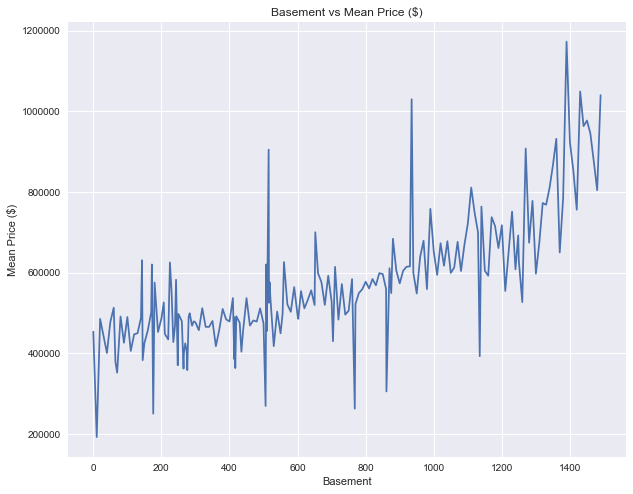

In [22]:
#Checking out a potential relationship between basement and price
plt.figure(figsize=(10, 8))
plt.plot(df.groupby('sqft_basement')['price'].mean())
plt.xlabel('Basement')
plt.ylabel('Mean Price ($)')
plt.title('Basement vs Mean Price ($)')

As we might guess, it looks like there is a correlation between having a large basement and a higher value price for a home.

Text(0.5, 1.0, 'Year Built vs Mean Price ($)')

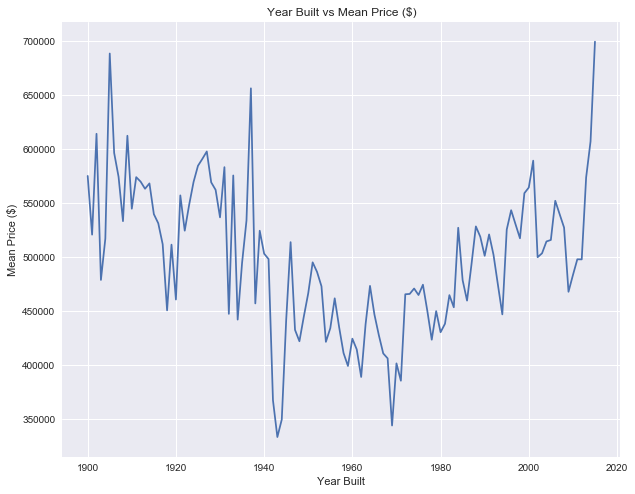

In [23]:
#Checking out a potential relationship between yr_built and price
plt.figure(figsize=(10, 8))
plt.plot(df.groupby('yr_built')['price'].mean())
plt.xlabel('Year Built')
plt.ylabel('Mean Price ($)')
plt.title('Year Built vs Mean Price ($)')

This is interesting to observe that much older and much newer homes are both valued higher in price than mid-century built homes.

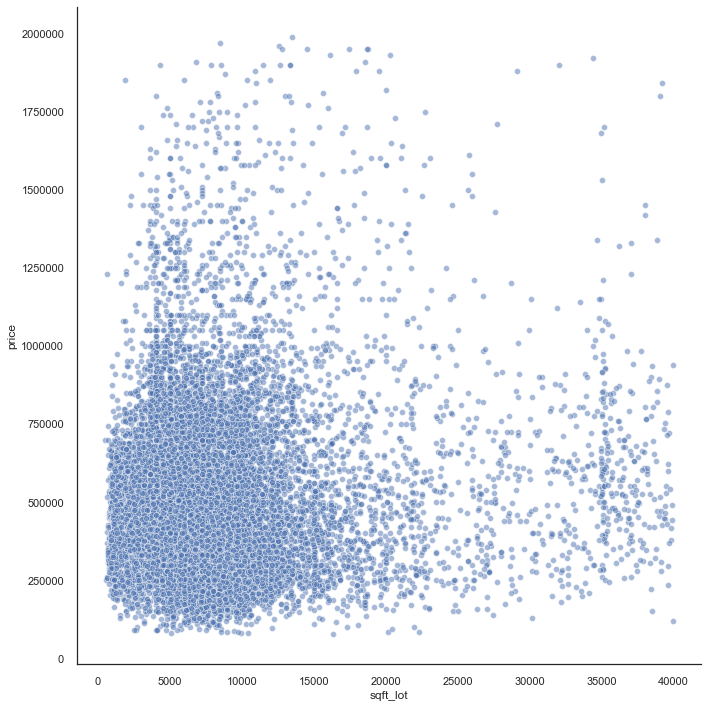

In [24]:
sns.set(style="white")
sns.relplot(x="sqft_lot", y="price", sizes=(50, 500), alpha=.5, palette="muted",
            height=10, data=df)

In [25]:
#(Using bins) In addition to these categories, I would also like to convert basement data to category to see if generally having a basement or not having a basement has an effect on the price of the house.#Starting with the 'sqft_basement' feature
#Looking at info for the feature before binning
df.sqft_basement.describe()

count   18199.00
mean      232.04
std       362.12
min         0.00
25%         0.00
50%         0.00
75%       450.00
max      1490.00
Name: sqft_basement, dtype: float64

In [26]:
#Creating bins
bins = [ -1 , 1 , df.sqft_basement.max() ]
labels = ['0','1']

df.sqft_basement = pd.cut(df.sqft_basement, bins, labels=labels)
df.sqft_basement = df.sqft_basement.astype('category')
sqft_basement1 = pd.get_dummies(df.sqft_basement, prefix='basement', drop_first=True)

In [27]:
df.sqft_basement.describe()

count     18199
unique        2
top           0
freq      11648
Name: sqft_basement, dtype: object

In [28]:
df.sqft_basement.head()

0    0
1    1
2    0
3    1
4    0
Name: sqft_basement, dtype: category
Categories (2, object): [0 < 1]

In [29]:
df = df.join([sqft_basement1])
df.drop(['sqft_basement'], axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18199 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        18199 non-null  float64
 1   bedrooms     18199 non-null  int64  
 2   sqft_living  18199 non-null  int64  
 3   sqft_lot     18199 non-null  int64  
 4   floors       18199 non-null  float64
 5   waterfront   18199 non-null  float64
 6   view         18199 non-null  int64  
 7   condition    18199 non-null  int64  
 8   yr_built     18199 non-null  int64  
 9   basement_1   18199 non-null  uint8  
dtypes: float64(3), int64(6), uint8(1)
memory usage: 2.0 MB


In [31]:
df.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'yr_built', 'basement_1'],
      dtype='object')

In [32]:
#We will change the other features into categorical data
#We will drop one of the dummies to avoid the Dummy Variable Trap and eliminate multicollinearity

#'bedrooms'
df.bedrooms = df.bedrooms.astype('category')
bedrooms = pd.get_dummies(df.bedrooms, prefix='bed', drop_first=True)

#'view'
df.view = df.view.astype('category')
view = pd.get_dummies(df.view, prefix='view', drop_first=True)

#'condition'
df.condition = df.condition.astype('category')
condition = pd.get_dummies(df.condition, prefix='cond', drop_first=True)


df = df.join([view, condition, bedrooms])
df.drop(['waterfront','view','condition','bedrooms', 'floors'], axis=1, inplace=True)
df.head()

,price,sqft_living,sqft_lot,yr_built,basement_1,view_1,view_2,view_3,view_4,cond_2,cond_3,cond_4,cond_5,bed_2,bed_3,bed_4
0,221900.00,1180,5650,1955,0,0,0,0,0,0,1,0,0,0,1,0
1,538000.00,2570,7242,1951,1,0,0,0,0,0,1,0,0,0,1,0
2,180000.00,770,10000,1933,0,0,0,0,0,0,1,0,0,1,0,0
3,604000.00,1960,5000,1965,1,0,0,0,0,0,0,0,1,0,0,1
4,510000.00,1680,8080,1987,0,0,0,0,0,0,1,0,0,0,1,0


In [33]:
#log Transformations
#logprice = np.log(df.price)
#logsqft_living = np.log(df["sqft_living"])
#logsqft_lot = np.log(df["sqft_lot"])

In [50]:
#Min Max Scaling

#df['price'] = ( price - min(price) ) / ( max(price) - min(price) )
#df['sqft_living'] = ( logsqft_living - min(logsqft_living) ) / ( max(logsqft_living) - min(logsqft_living) )
#df['sqft_lot'] = ( logsqft_lot - min(logsqft_lot) ) / ( max(logsqft_lot) - min(logsqft_lot) )



## Step Four: Model Data

### Train-Test-Split
It is important to create a sample of data from our dataset to test our model with in order to avoid overfitting or underfitting the model. The data will need to be randomly split so the model will not be overfit to a specific segment of data.

In [51]:
# Create X and y
y = df['price']
X = df.drop(columns=['price'], axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)


In [52]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression

# Fit the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Print R2 and MSE for training and test sets
print('Training r^2:', linreg.score(X_train, y_train))
print('Test r^2:', linreg.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg.predict(X_train)))
print('Test MSE:', mean_squared_error(y_test, linreg.predict(X_test)))

Training r^2: 0.4680086034362291
Test r^2: 0.4690575376626489
Training MSE: 0.0006022719292385479
Test MSE: 0.0005868610183564722


In [53]:
from statsmodels.formula.api import ols
y_1 = df['price']
X_1 = df.drop(columns=['price'], axis=1)
#ols
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
formula

'price~sqft_living+sqft_lot+yr_built+basement_1+view_1+view_2+view_3+view_4+cond_2+cond_3+cond_4+cond_5+bed_2+bed_3+bed_4'

In [54]:
#Train Test Split
X_1, y_1 = df[[x for x in df.columns if x != 'price']], df[['price']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size = 0.2, random_state=123)

In [67]:
#Test Set
model_V2 = sm.OLS(np.log(y1_test), sm.add_constant(X1_test)).fit()
model_V2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:28:46   Log-Likelihood:                -2185.4
No. Observations:                3640   AIC:                             4403.
Df Residuals:                    3624   BIC:                             4502.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.9443      0.628      6.280      0.000       2.713       5.176
sqft_living     3.4255      0.079     43.139      0.000       3.270       3.581
sqft_lot       -0.8178      0.052    -15.651      0.000      -0.920      -0.715
yr_built       -0.0043      0.000    -13.782      0.000      -0.005      -0.004
basement_1     -0.0456      0.017     -2.687      0.007      -0.079      -0.012
view_1          0.2139      0.067      3.199      0.001       0.083       0.345
view_2          0.2221      0.042      5.247      0.000       0.139       0.305
view_3          0.2534      0.059      4.265      0.000       0.137       0.370
view_4          0.6779      0.084      8.083      0.000       0.513       0.842
cond_2         -0.2223      0.214     -1.037      0.300      -0.643       0.198
cond_3          0.0293      0.199      0.147      0.883      -0.360       0.418
cond_4          0.0368      0.198      0.185      0.853      -0.352       0.426
cond_5          0.0880      0.200      0.441      0.659      -0.303       0.479
bed_2           0.0416      0.078      0.534      0.593      -0.111       0.194
bed_3          -0.1023      0.079     -1.302      0.193      -0.256       0.052
bed_4          -0.1508      0.081     -1.852      0.064      -0.311       0.009
==============================================================================
Omnibus:                      255.221   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.758
Skew:                          -0.537   Prob(JB):                     9.59e-93
Kurtosis:                       4.281   Cond. No.                     1.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [59]:
result = stepwise_selection(predictors, df['price'], verbose=True)
print('resulting features:')
print(result)

/Users/rosegold/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  sqft_living                    with p-value 0.0
Add  yr_built                       with p-value 9.14987e-258
Add  view_4                         with p-value 7.74865e-152
Add  sqft_lot                       with p-value 1.02172e-159
Add  bed_2                          with p-value 2.37012e-68
Add  view_3                         with p-value 4.45195e-64
Add  view_2                         with p-value 5.90678e-50
Add  view_1                         with p-value 7.54773e-26
Add  basement_1                     with p-value 9.34026e-18
Add  cond_5                         with p-value 1.59329e-09
Add  bed_4                          with p-value 1.77351e-07
Add  bed_3                          with p-value 1.13477e-23
Add  cond_2                         with p-value 0.00322974
resulting features:
['sqft_living', 'yr_built', 'view_4', 'sqft_lot', 'bed_2', 'view_3', 'view_2', 'view_1', 'basement_1', 'cond_5', 'bed_4', 'bed_3', 'cond_2']


In [60]:
#Cross validation
X = df.drop(['price'],axis=1)
y = df.price
cv_5_results= np.mean(cross_val_score(linreg, X, y, cv=5))

print(cv_5_results)


0.4629398379533843


In [61]:
#The result is not so great. Let's try to use the selected features and run another model.

In [62]:
#Feature Selection
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(predictors, df['price'])
 
#Finding out which features were selected
selector.support_ 

array([ True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False])

In [63]:
#Shows the ranking of the features. 1 = selected
#'sqft_living', 'view_2' and 'view_1' were selected
selector.ranking_

array([ 1,  2, 13, 12,  3,  4,  1,  1,  9, 10, 11,  7,  8,  6,  5])

In [64]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[0.13548615 0.02896793 0.05863182]
-0.023672969396957524


In [65]:
X = df[['sqft_living','view_2','view_1']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

cv_5_results= np.mean(cross_val_score(linreg, X, y, cv=5))

print(cv_5_results)

0.35868209290532416


# Conclusions

During this project we analyzed the Kings County Housing Sales dataset. The purpose of this project was to use the OSEMiN Data Science Framework to analyze the different features that could impact the sales prices of the homes. The project used a simple linear regression model, OLS regression model and Stepwise Selection to choose potential features that could contribute to the sales price. After using these selected features in another linear regression model we have seen that the model accuracy actually worsened. (From 46.2% accuracy to 35.8%). This shows the first model was not a perfect fit and therefore can be improved upon to improve feature selection. Future explorations of this project will be focusing on categorical data and its possible impact on the models as well as exploring other models and improving accuracy.